# Visulize the output of conv layers, also called the activation of conv layers.

In [1]:
from keras.models import load_model
model=load_model("cats_and_dogs_small.h5")
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

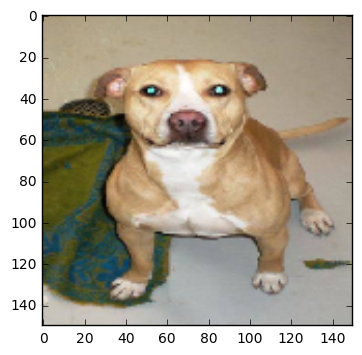

In [2]:
test_img="small_train/test/dogs/dog.113.jpg"
from keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
img=image.load_img(test_img,target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.

plt.imshow(img_tensor[0])
plt.show()


# Define a model with one input but multi-outputs

In [3]:
from keras import models
layer_outputs=[layer.output for layer in model.layers[:8]]

activation_model=models.Model(inputs=model.input,outputs=layer_outputs)

activations=activation_model.predict(img_tensor)


# Visualization 

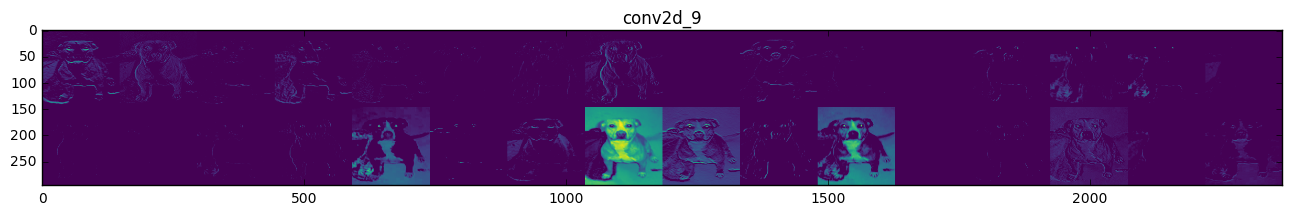

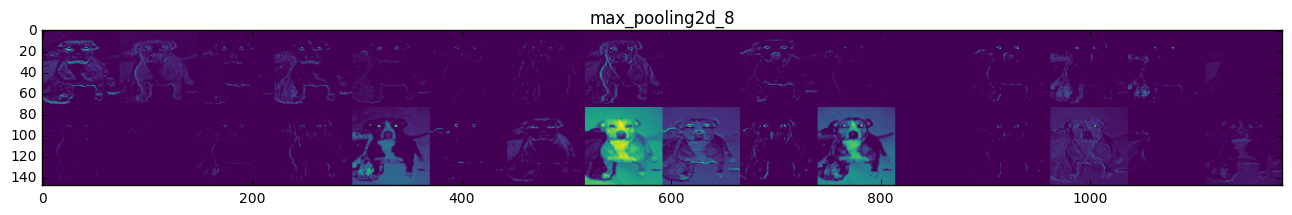

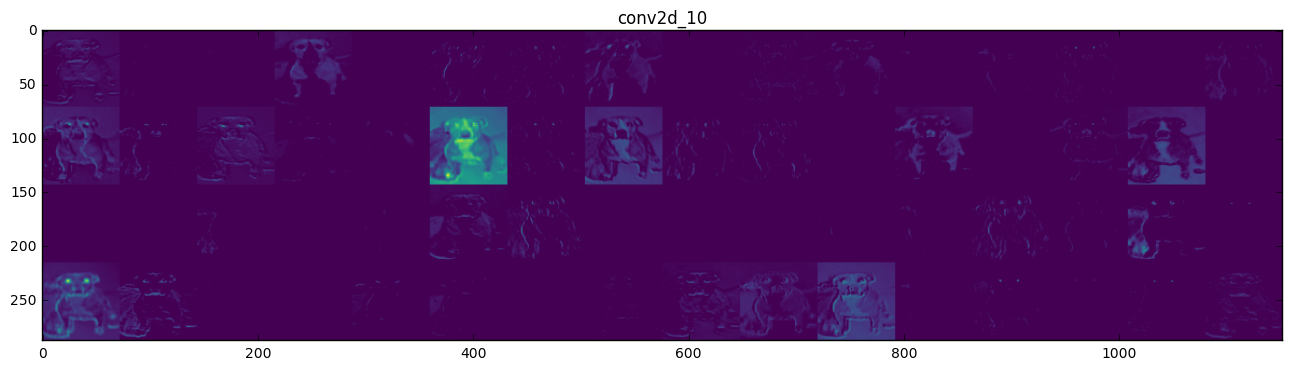

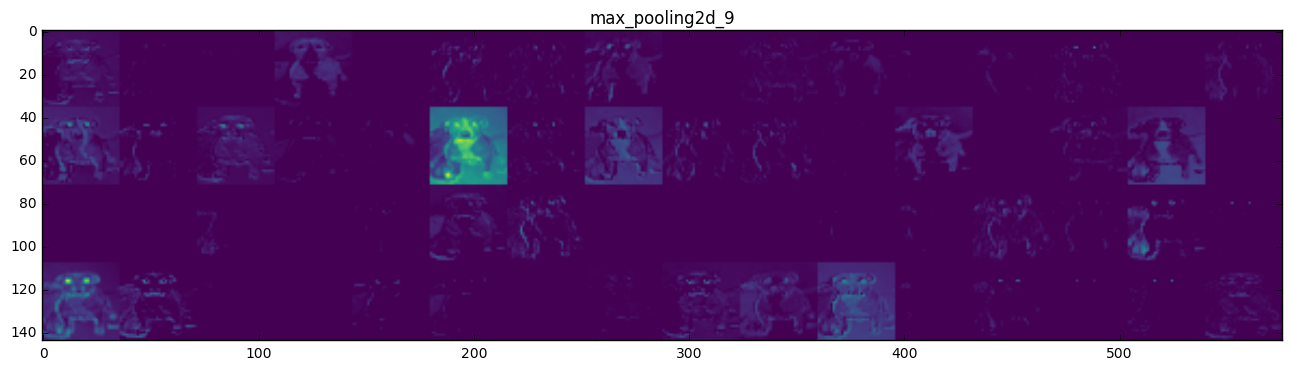

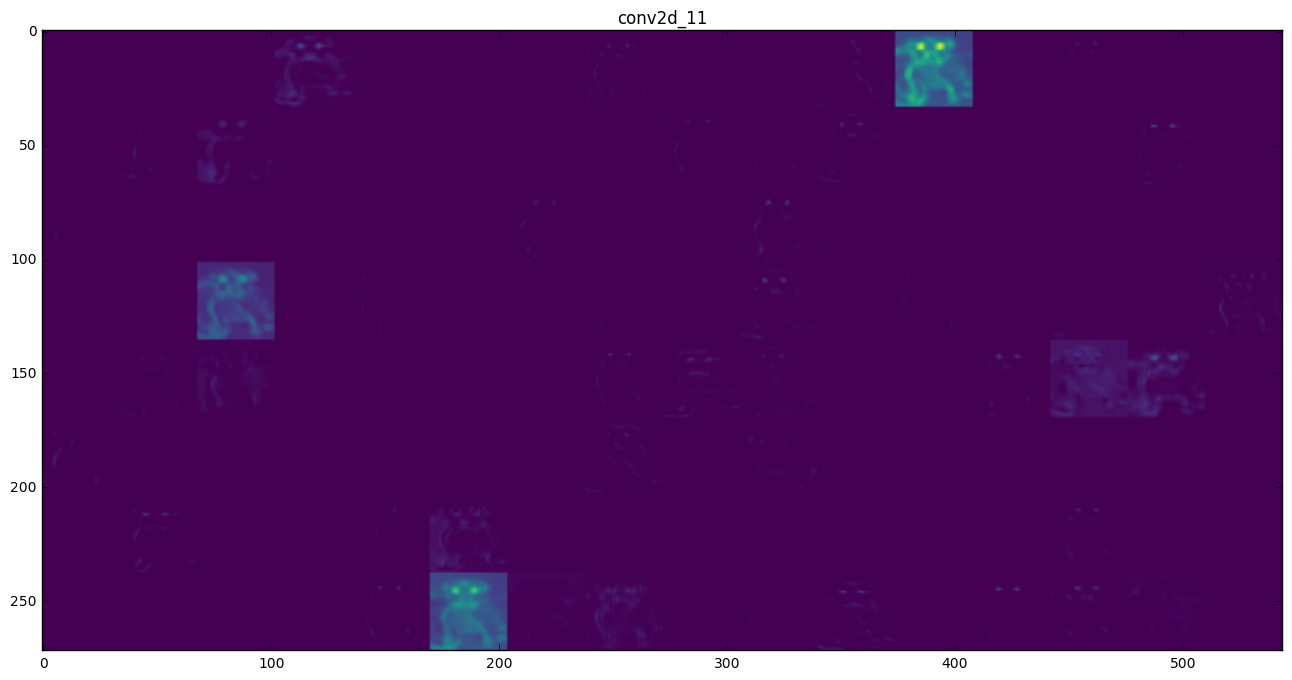

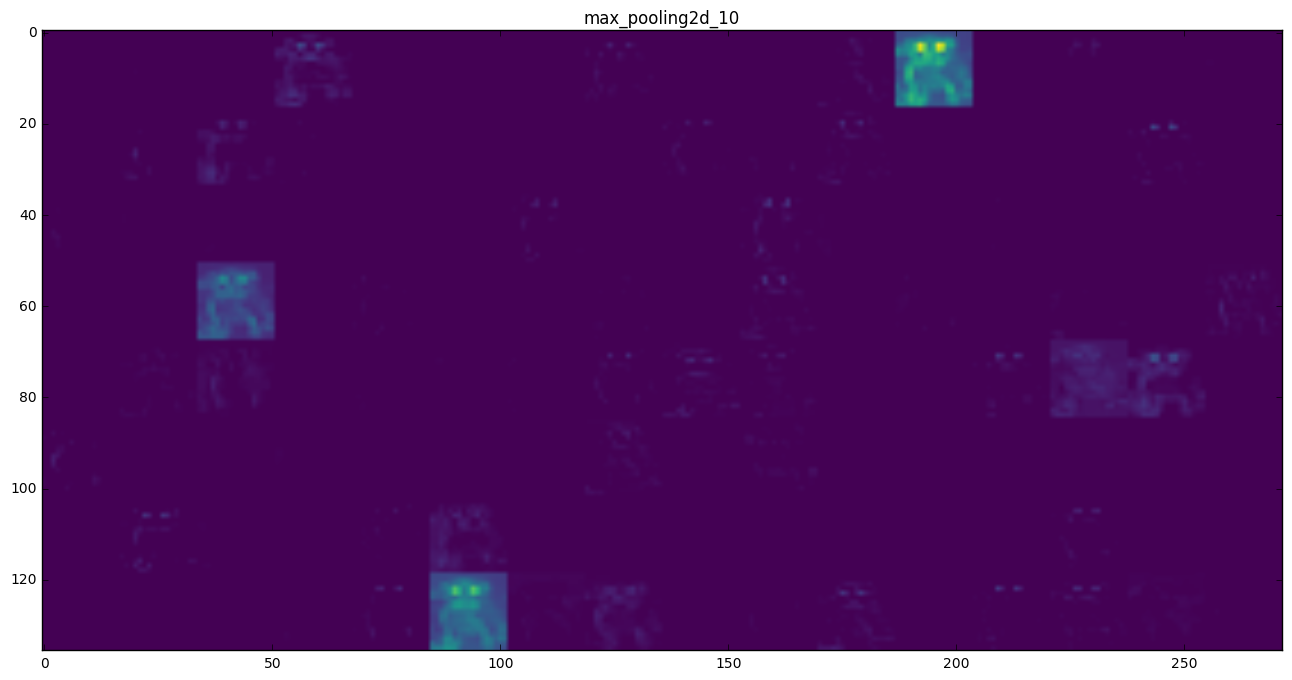

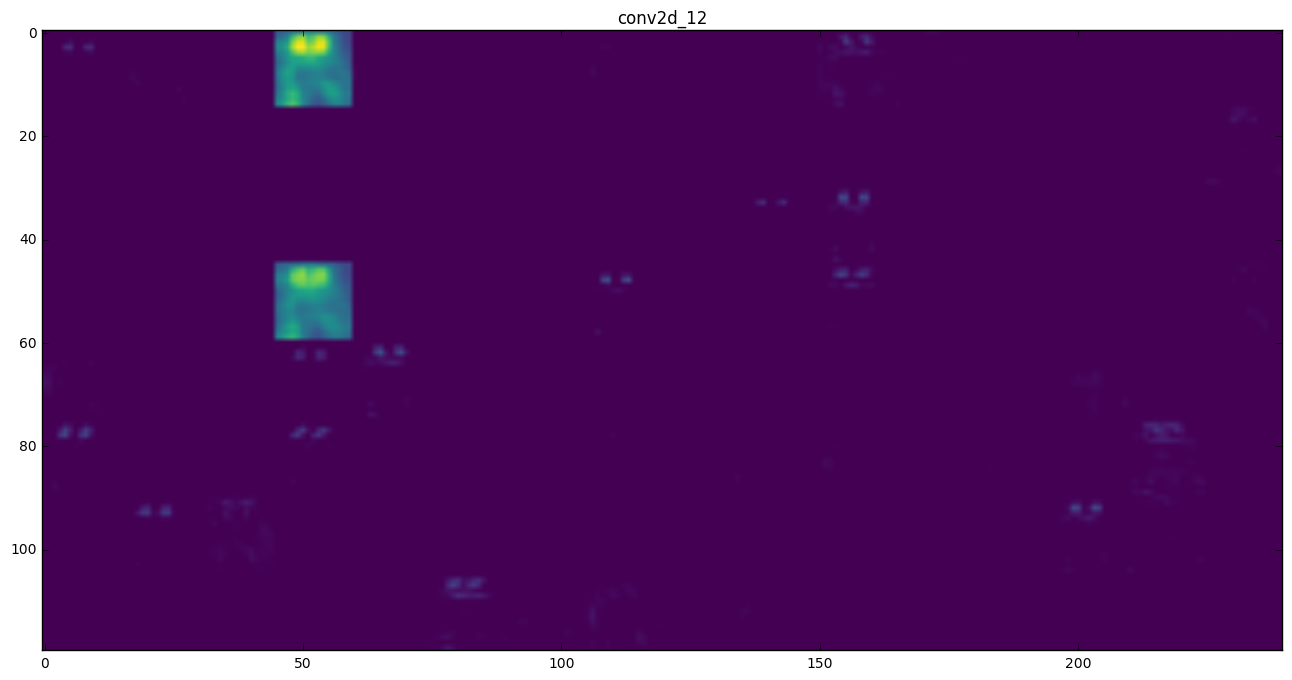

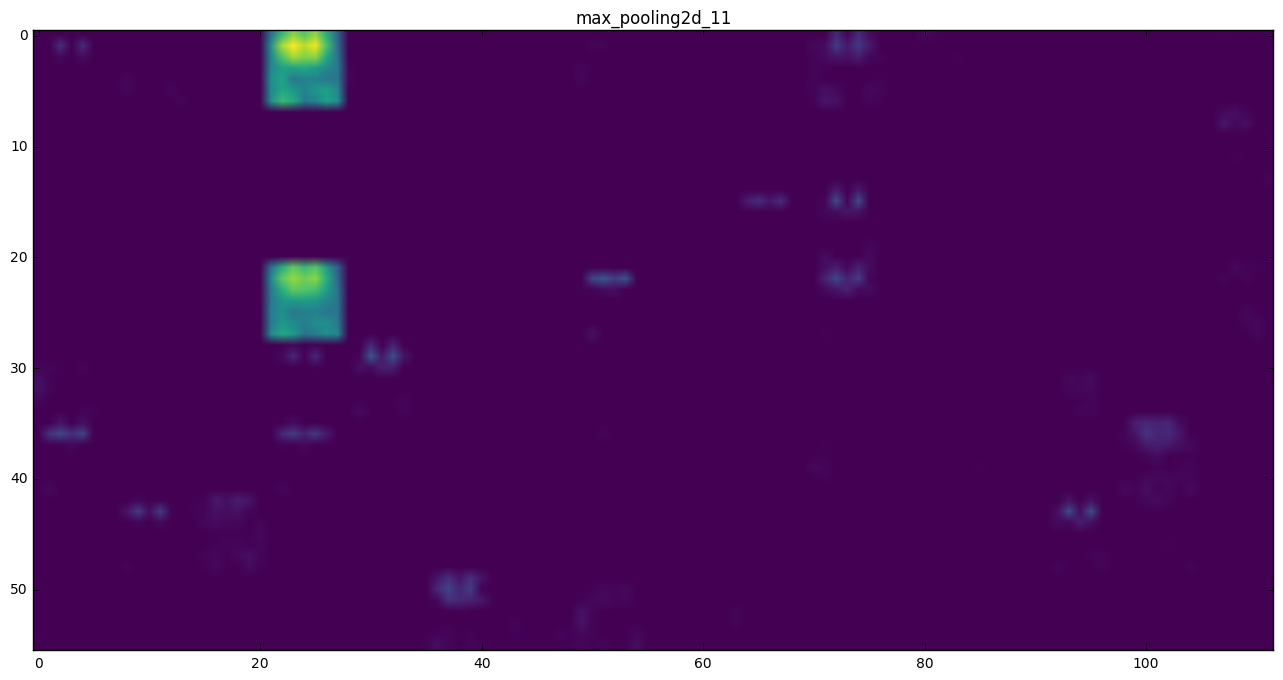

In [11]:
import numpy as np
layers_names=[layer.name for layer in model.layers[:8]]
n_col=16
for layer_name,activation in zip(layers_names,activations):
    channels=activation.shape[-1]
    n_row=channels//n_col
    size=activation.shape[1]
    display=np.zeros((n_row*size,n_col*size))
    for i in range(channels):
        row=i//n_col
        column=i%n_col
        display[row*size:(row+1)*size,column*size:(column+1)*size]=activation[0,:,:,i]
    scale=1./size
    plt.figure(figsize=(scale*display.shape[1],scale*display.shape[0]))
    plt.title(layer_name)
    plt.imshow(display,aspect="auto",cmap="viridis")
    plt.show()